
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Seed for reproducibility
np.random.seed(42)


In [3]:
class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
    
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been fitted yet.")
        # Adding epsilon to std to avoid division by zero
        return (X - self.mean) / (self.std + 1e-8)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.epochs):
            
            y_pred = np.dot(X, self.weights) + self.bias
            
            mse_loss = (1 / (2 * n_samples)) * np.sum((y_pred - y)**2)
            l2_loss = (self.l2_lambda / (2 * n_samples)) * np.sum(np.square(self.weights))
            total_loss = mse_loss + l2_loss
            self.loss_history.append(total_loss)
            
            dw = (1 / n_samples) * (np.dot(X.T, (y_pred - y)) + (self.l2_lambda * self.weights))
            
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

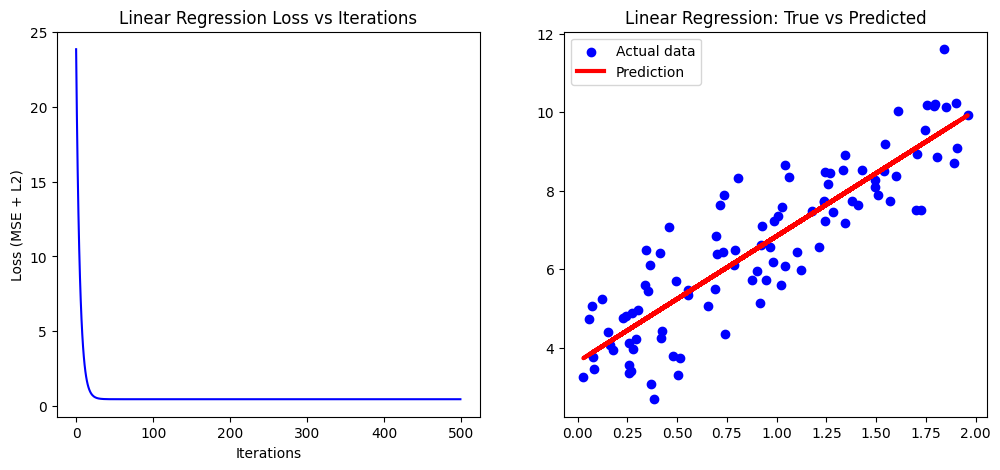

Final Weights: [1.79140117]
Final Bias: 6.601871989094574


In [11]:
 
X_train = 2 * np.random.rand(100, 1)

y_train = 4 + 3 * X_train.flatten() + np.random.randn(100)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_train)

lin_reg = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.1)
lin_reg.fit(X_scaled, y_train)

plt.figure(figsize=(12, 5))

# Plot 1: Loss Curve
plt.subplot(1, 2, 1)
plt.plot(lin_reg.loss_history, color='blue')
plt.title('Linear Regression Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE + L2)')

# Plot 2: Prediction
plt.subplot(1, 2, 2)
y_pred = lin_reg.predict(X_scaled)
plt.scatter(X_train, y_train, color='blue', label='Actual data')
plt.plot(X_train, y_pred, color='red', linewidth=3, label='Prediction')
plt.title('Linear Regression: True vs Predicted')
plt.legend()
plt.show()

print(f"Final Weights: {lin_reg.weights}")
print(f"Final Bias: {lin_reg.bias}")


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [12]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Tiny value to prevent log(0) error
        epsilon = 1e-15 

        for i in range(self.epochs):
            
            linear_pred = np.dot(X, self.weights) + self.bias
            
            y_prob = sigmoid(linear_pred)
            
            #loss
            y_prob_clipped = np.clip(y_prob, epsilon, 1 - epsilon)
            
            bce_loss = - (1 / n_samples) * np.sum(y * np.log(y_prob_clipped) + (1 - y) * np.log(1 - y_prob_clipped))
            l2_loss = (self.l2_lambda / (2 * n_samples)) * np.sum(np.square(self.weights))
            self.loss_history.append(bce_loss + l2_loss)
            
            dw = (1 / n_samples) * (np.dot(X.T, (y_prob - y)) + (self.l2_lambda * self.weights))
            db = (1 / n_samples) * np.sum(y_prob - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_pred)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

Final Training Accuracy: 100.00%


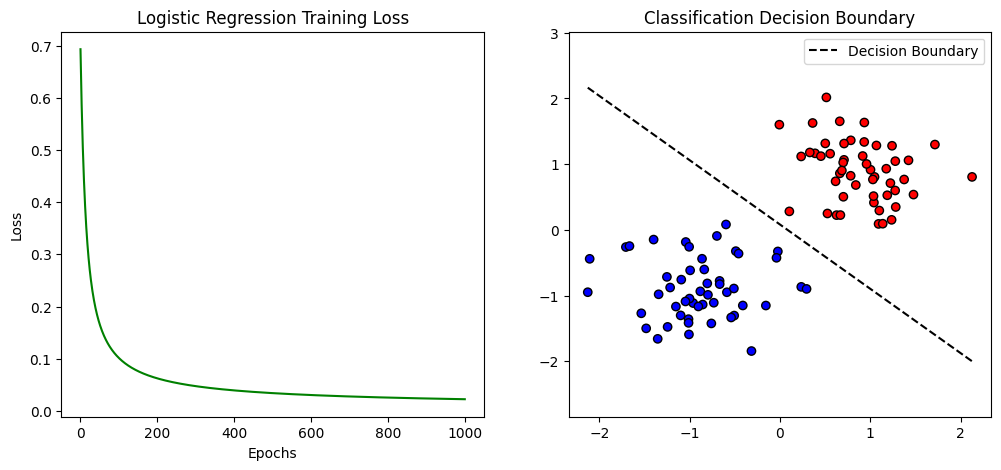

In [13]:

X_class_0 = np.random.randn(50, 2) + np.array([-2, -2])
X_class_1 = np.random.randn(50, 2) + np.array([2, 2])
X_cls = np.vstack([X_class_0, X_class_1])
y_cls = np.array([0]*50 + [1]*50)

scaler_cls = StandardScalerManual()
X_cls_scaled = scaler_cls.fit_transform(X_cls)

log_reg = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
log_reg.fit(X_cls_scaled, y_cls)

acc = np.mean(log_reg.predict(X_cls_scaled) == y_cls)
print(f"Final Training Accuracy: {acc * 100:.2f}%")

plt.figure(figsize=(12, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(log_reg.loss_history, color='green')
plt.title('Logistic Regression Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot 2: Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(X_cls_scaled[:, 0], X_cls_scaled[:, 1], c=y_cls, cmap='bwr', edgecolor='k')

w1, w2 = log_reg.weights
b = log_reg.bias
x1_min, x1_max = X_cls_scaled[:, 0].min(), X_cls_scaled[:, 0].max()
x1_vals = np.linspace(x1_min, x1_max, 100)
x2_vals = -(w1 * x1_vals + b) / w2

plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
plt.title('Classification Decision Boundary')
plt.legend()
plt.ylim(X_cls_scaled[:, 1].min()-1, X_cls_scaled[:, 1].max()+1)
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [9]:
def kmeans_matrix(M, k, max_iters=100):

    rows, cols = M.shape
    
    M_flat = M.reshape(-1, 1)
    
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, n_init=10, random_state=42)
    kmeans.fit(M_flat)
    
    labels_flat = kmeans.labels_
    centroids = kmeans.cluster_centers_.flatten()

    assignment_table = labels_flat.reshape(rows, cols)
    
    cookbook = {i: [] for i in range(k)}
    
    for r in range(rows):
        for c in range(cols):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))
            
    return assignment_table, cookbook, centroids

Centroids found: [ 31.38 123.19 214.18]

Sample of Cookbook (Cluster 0 indices):
[(0, 3), (0, 4), (0, 5), (0, 8), (1, 0)] ... (truncated)


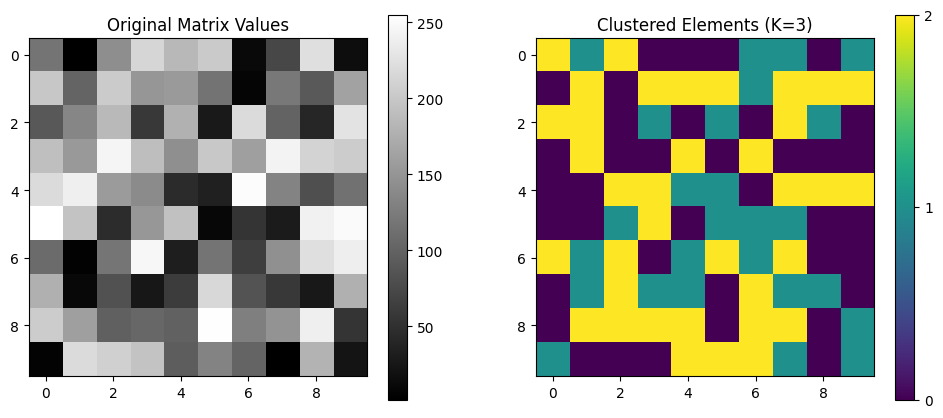

In [10]:

M = np.random.randint(0, 256, (10, 10))

k = 3
assignment, cookbook, centroids = kmeans_matrix(M, k=k)

print("Centroids found:", np.sort(np.round(centroids, 2)))
print("\nSample of Cookbook (Cluster 0 indices):")
print(cookbook[0][:5], "... (truncated)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(M, cmap='gray')
plt.title("Original Matrix Values")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(assignment, cmap='viridis')
plt.title(f"Clustered Elements (K={k})")
plt.colorbar(ticks=range(k))
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
